In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
import random as r
from pprint import pprint as ppr

In [2]:
initdf = pd.read_csv('cpidata_whole.csv')
initdf.head()

datelist = [initdf['date'][i].split('/') for i in range(len(initdf))]
initdf['year'] = [int(datelist[i][2]) for i in range(len(initdf))]

In [3]:
# These will be important later
list1 = ['dairyinf', 'mpfeinf', 'fvinf']
list2 = ['dairycpi', 'mpfecpi', 'fvcpi']

# monthly inflation values
for i in range(len(list1)):
    initdf[list1[i]] = initdf[list2[i]].pct_change(periods=1)

# Removes empty first row of pct change values
initdf.dropna(inplace=True)
initdf.reset_index()
initdf

# This can be changed to any years that scratch your fancy, the loop will
# automatically grab that year plus 4 more. List MUST BE INTEGERS or loop
# will not function
filterlist = [r.randint(1967,2019) for i in range(10)]
filterlist.append(2020)
summarydict = {}

In [4]:
currdf = initdf[(initdf['year'] >= 2010) & (initdf['year'] <= (2010 + 4))]
currdf.reset_index(drop=True, inplace = True)
currdf
years = currdf['year'].unique()
years

array([2010, 2011, 2012, 2013, 2014])

In [5]:
# Main loop
for year in filterlist:
    currdf = initdf[(initdf['year'] >= year) & (initdf['year'] <= (year + 4))]
    currdf.reset_index(drop=True, inplace = True)
    years = currdf['year'].unique()
    for year in years:
        # Percent Change for each category for the given years
        # Total percent change over the 5 year period, taken to mean 
        # average inflation over 5 year period
        percchangelist = [((currdf[list2[m]][int(len(currdf)-1)])-(currdf[list2[m]][0]))/(currdf[list2[m]][0]) for m in range(0,3)]
        # summary data for all 3 variables in the current year
        for i in range(len(list2)):
            summarydict[str(year)+list2[i]] = {'mean':round(float(currdf[list2[i]].mean()), 2),
                                'median':currdf[list2[i]].median(),
                                'mode':round(float(currdf[list2[i]].mode()[0]),2),
                                'standard error':round(float(currdf[list2[i]].sem()),2),
                                'percChange' : round(float(percchangelist[i]),2)}    # Percent Change in 
            
        # plotting the data for easier understanding, commented out just to save time for testing
        """n = 0
        for item in list1:
            print(f"Percent change over total period: {round(percchangelist[n],2)}%")
            fig, ax = plt.subplots()
            ax.plot(currdf['date'], currdf[item])
            ax.set_xticks(ax.get_xticks()[::2])
            fig.tight_layout()
            plt.xlabel(f'Date')
            plt.ylabel(f'% Change Inflation')
            plt.title(f'% Change Inflation from {year} to {year+4} for {item}')
            plt.xticks(fontsize = 5, rotation=90)
            plt.show()
            n += 1"""

ppr(summarydict)

{'1970dairycpi': {'mean': 49.92,
                  'median': 46.8,
                  'mode': 46.4,
                  'percChange': 0.41,
                  'standard error': 0.78},
 '1970fvcpi': {'mean': 44.35,
               'median': 41.6,
               'mode': 37.7,
               'percChange': 0.48,
               'standard error': 0.85},
 '1970mpfecpi': {'mean': 51.96,
                 'median': 47.900000000000006,
                 'mode': 44.2,
                 'percChange': 0.38,
                 'standard error': 1.09},
 '1971dairycpi': {'mean': 49.92,
                  'median': 46.8,
                  'mode': 46.4,
                  'percChange': 0.41,
                  'standard error': 0.78},
 '1971fvcpi': {'mean': 44.35,
               'median': 41.6,
               'mode': 37.7,
               'percChange': 0.48,
               'standard error': 0.85},
 '1971mpfecpi': {'mean': 51.96,
                 'median': 47.900000000000006,
                 'mode': 44.2,
           

In [6]:
# TO USE SUMMARYDICT:
# query = f'{year}{category}'
# query2 = data label, eg: 'median' 
# summarydict[query][query2]
query = '1994mpfecpi' # 1973 meat, poultry, fish, and eggs
query2 = 'percChange' # Percent change from 0 to end of 4 years later
object1 = summarydict[query][query2]
print(object1)

0.08


In [7]:
output = {}
for key, value in summarydict.items():
    output[key] = summarydict[key]['percChange']
outputdf = pd.DataFrame(output, ['PercChange'])
outputdf = outputdf.transpose()
sampledf = outputdf.sample(frac=0.5, random_state=11)
sampledf = sampledf.sort_index()
sampledf.reset_index(inplace=True)
sampledf.head()

,index,PercChange
0,1970dairycpi,0.41
1,1971fvcpi,0.48
2,1972dairycpi,0.41
3,1972mpfecpi,0.38
4,1973dairycpi,0.41


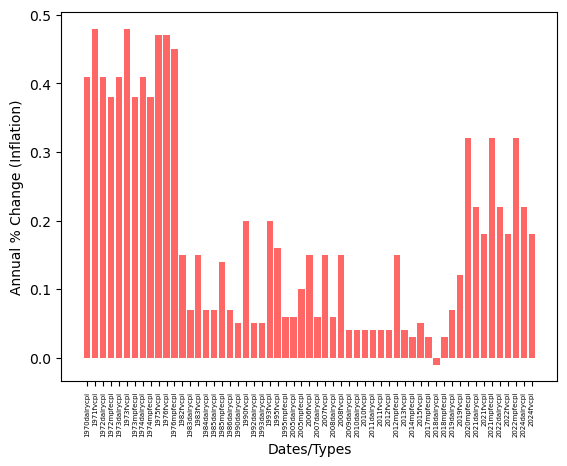

In [8]:
# Plot shows 5 year percent change values for different 5 year groups
plt.bar(sampledf['index'],sampledf['PercChange'], color = 'r', alpha = 0.6)
plt.xticks(fontsize=5, rotation=90)
plt.xlabel('Dates/Types')
plt.ylabel('Annual % Change (Inflation)')
plt.show()


In [9]:
inflationdf = pd.read_csv('inflation_annual.csv')
inflationdf.head()


,date,inflation
0,1/1/1967,2.772786
1,1/1/1968,4.271796
2,1/1/1969,5.462386
3,1/1/1970,5.838255
4,1/1/1971,4.292767


In [10]:
outputdf = outputdf.sort_index()
outputdf.reset_index(inplace=True)
outputdf.columns = ['date1', 'PercChange']
outputdf['date'] = pd.Series([])
outputdf

,date1,PercChange,date
0,1970dairycpi,0.41,NaN
1,1970fvcpi,0.48,NaN
2,1970mpfecpi,0.38,NaN
3,1971dairycpi,0.41,NaN
4,1971fvcpi,0.48,NaN
...,...,...,...
109,2023fvcpi,0.18,NaN
110,2023mpfecpi,0.32,NaN
111,2024dairycpi,0.22,NaN
112,2024fvcpi,0.18,NaN


In [11]:
print(outputdf['date1'][0][0:4])

1970


In [12]:
yearlist = []
for index, row in outputdf.iterrows():
    yearlist.append(row['date1'][0:4])
    outputdf.loc[index, 'date'] = yearlist[index]
    
    
outputdf
yeargroup = outputdf.groupby(outputdf['date'])
yeargroupdf = yeargroup.sum()
yeargroupdf['PercChange'] = round(yeargroupdf['PercChange']/3,2)
yeargroupdf['date1'] = list(yeargroupdf.index)
yeargroupdf.head()


,date1,PercChange
date,,
1970,1970,0.42
1971,1971,0.42
1972,1972,0.42
1973,1973,0.42
1974,1974,0.42


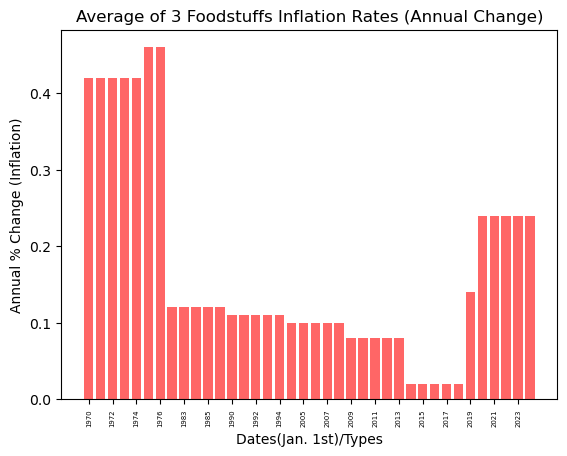

In [13]:
plt.bar(yeargroupdf['date1'], yeargroupdf['PercChange'], color = 'r', alpha = 0.6)
locs, labels = plt.xticks()
plt.xticks(locs[::2],labels[::2],fontsize=5, rotation=90)
plt.xlabel('Dates(Jan. 1st)/Types')
plt.ylabel('Annual % Change (Inflation)')
plt.title('Average of 3 Foodstuffs Inflation Rates (Annual Change)')
plt.show()

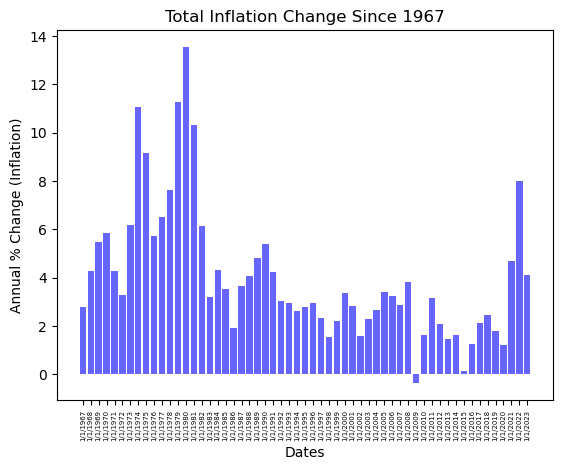

In [14]:
plt.bar(data=inflationdf,x='date',height='inflation', color = 'blue', alpha = 0.6)
plt.xticks(fontsize=5, rotation=90)
plt.xlabel('Dates')
plt.ylabel('Annual % Change (Inflation)')
plt.title('Total Inflation Change Since 1967')
plt.show()

In [15]:
# initdf, inflationdf
initdf
newdf = initdf[['date','dairycpi','mpfecpi','fvcpi']]
annuallist = [i for i in newdf['date'] if ('1/1/' in i)&~('11/1/' in i)]
outputdict = {}

for index, row in newdf.iterrows():
    if row['date'] in annuallist:
        outputdict[f"{row['date']}"] = row[['dairycpi','mpfecpi','fvcpi']]

new2df = pd.DataFrame(outputdict)
new2df = new2df.transpose()
new2df.reset_index(inplace=True)
new2df.columns = ['date','dairycpi','mpfecpi','fvcpi']
mergedf = new2df.merge(inflationdf, on='date')
for item in list2:
    mergedf[list2] = mergedf[list2].astype(float)
for item in list2 + ['inflation']:
    mergedf[item] = round(mergedf[item],2)

mergedf[['dairycpi','mpfecpi','fvcpi']] = mergedf[['dairycpi','mpfecpi','fvcpi']].pct_change() * 100
mergedf.dropna(inplace=True)
mergedf.columns = ['date','dairyinf','mpfeinf','fvinf','inflation']
mergedf.head()
len(mergedf)


55

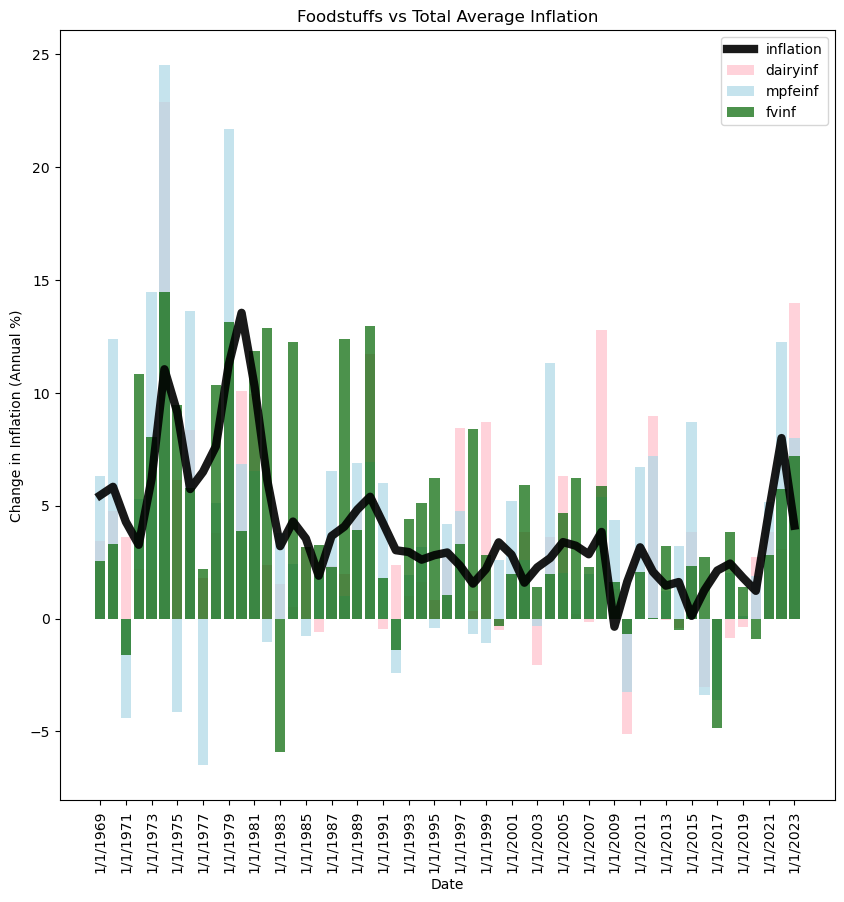

In [16]:
plt.figure(figsize=(10,10))
plt.bar(mergedf['date'], mergedf['dairyinf'], color = 'pink', alpha=0.7)
plt.bar(mergedf['date'], mergedf['mpfeinf'], color = 'lightblue', alpha=0.7)
plt.bar(mergedf['date'], mergedf['fvinf'], color = 'darkgreen', alpha=0.7)
plt.plot(mergedf['date'], mergedf['inflation'], color = 'black', alpha=0.9, lw=6)
locs, labels = plt.xticks()
plt.xticks(locs[::2],labels[::2],fontsize=10, rotation=90)
labels = ['inflation','dairyinf','mpfeinf','fvinf']
plt.legend(labels = labels)
plt.xlabel('Date')
plt.ylabel('Change in Inflation (Annual %)')
plt.title('Foodstuffs vs Total Average Inflation')
plt.savefig('fs_v_tai.png')
plt.show()

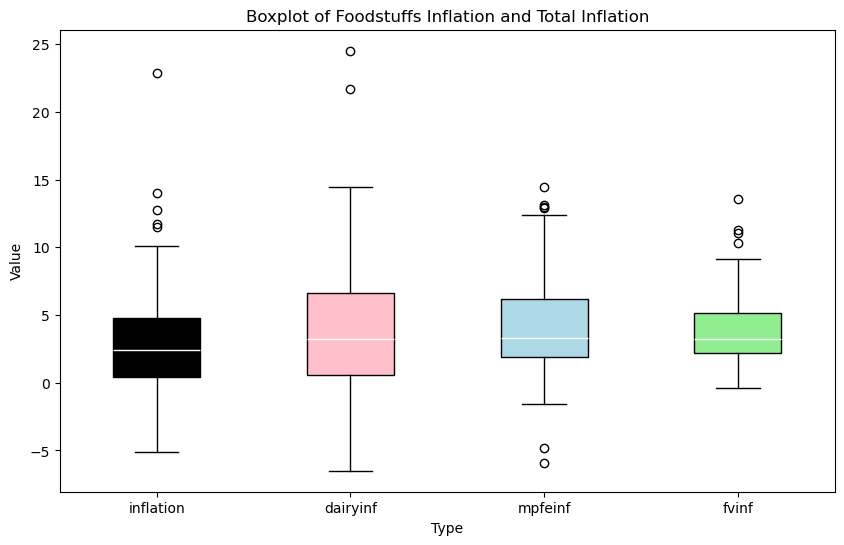

In [31]:
data = [mergedf['dairyinf'], mergedf['mpfeinf'], mergedf['fvinf'], mergedf['inflation']]
plt.figure(figsize=(10,6))
boxplot = plt.boxplot(data, patch_artist=True, tick_labels=labels)
colors = ['black', 'pink', 'lightblue', 'lightgreen']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
for median in boxplot['medians']:
    median.set_color('white')
plt.title('Boxplot of Foodstuffs Inflation and Total Inflation')
plt.xlabel('Type')
plt.ylabel('Value')
plt.savefig('boxplot.png')
plt.show()

In [18]:
outputdict = {}
i = 0
for item in labels:
    q1 = mergedf[item].quantile(0.25)
    q3 = mergedf[item].quantile(0.75)
    iqr = q3 - q1
    outputdict[f"{labels[i]}"] = {'q1':round(float(q1),2),
                                  'q3':round(float(q3),2),
                                  'iqr':round(float(iqr),2)}
    i += 1
ppr(outputdict)

{'dairyinf': {'iqr': 4.38, 'q1': 0.42, 'q3': 4.8},
 'fvinf': {'iqr': 4.32, 'q1': 1.9, 'q3': 6.21},
 'inflation': {'iqr': 2.89, 'q1': 2.23, 'q3': 5.12},
 'mpfeinf': {'iqr': 6.06, 'q1': 0.56, 'q3': 6.63}}


In [32]:
i = 0
outdict = {}
for key, val in outputdict.items():
    filterdf = mergedf[(mergedf[key]>(val['q3']+1.5*iqr))|(mergedf[key]<(val['q1']-1.5*iqr))]
    outdict[key] = filterdf
outlist = []
for key, outdf in outdict.items():
    outlist.append(outdf)
outlierdf = pd.concat(outlist, ignore_index=True)
outlierdf.sort_values('date', inplace=True)
outlierdf
outlierdf.to_csv('outlier_inflation_years.csv')

# outlierdf contains data for all years in which the IQR test determined that 
# the values were outliers. 
# These years could be indicitave of several things:
#  - The beginning of a recession
#  - Shortage of supplies for a given industry